# geoDB Access

The geoDB is a service provided by the [Euro Data Cube project](https://eurodatacube.com) (EDC) as a payed service. It comes
with a Python client that provides hugh level acess to your data and a certain amount of space in a PostGreSQL database. For exploring data you will need
at least a read only to the geoDB which you can purchase at the [EDC market place](https://hub.eox.at).

You can access the service in two ways:

- By using the Jupyter Python notebook provided by EDC Marketplace (configuartion free, ```geodb = GeoDBClient()```)
- By using you own Jupyter notebook or Python script by providing a client id and secret to the GeoDBClient (```geodb = GeoDBClient(client_id="myid", client_secret="mysecet")```)

The client ID and secret is also provided by EDC in the latter case. You will find them in your EDC Marketplace account section. You can also provide the credentials
via system environment varibles (GEODB_AUTH_CLIENT_ID and GEODB_AUTH_CLIENT_SECRET). These variables can be supplied via a .env file. 


## Exploring Data




In [3]:
from xcube_geodb.core.geodb import GeoDBClient

##  Login from any maschine
### comment if not on EDC

Install xcube geoDB with command:
  
 `conda install xcube_geodb -c conda-forge`


In [4]:
#client_id=YourID
#client_secret=YourSecret
#geodb = GeoDBClient(client_id=client_id, client_secret=client_secret)

## Login in EDC environment
### uncomment if on EDC

In [5]:
geodb = GeoDBClient()

### Get your user name

In [6]:
geodb.whoami

'geodb_admin'

### List Datasets

__Step 1__: List all datasets a user has access to.

In [7]:
geodb.get_my_usage() # to be updated so that all available collections are displayed includign sensible information ont heir availability, e.g. public, purchased, etc..

{'usage': '24 MB'}

In [8]:
geodb.get_my_collections()

,table_name,database,grantee
0,anja_land_use_slo,anja,PUBLIC
1,geodb_admin_land_use,geodb_admin,geodb_admin
2,geodb_admin_test,geodb_admin,geodb_admin
3,geodb_a659367d-04c2-44ff-8563-cb488da309e4_lpi...,geodb_a659367d-04c2-44ff-8563-cb488da309e4,PUBLIC
4,geodb_ciuser_land_use,geodb_ciuser,PUBLIC
5,anja_lpis_slo,anja,PUBLIC
6,geodb_a659367d-04c2-44ff-8563-cb488da309e4_cla...,geodb_a659367d-04c2-44ff-8563-cb488da309e4,PUBLIC
7,geodb_admin_test2,geodb_admin,geodb_admin
8,geodb_admin_geodb_admin_land_use,geodb_admin,geodb_admin
9,geodb_0c0a0ef4-8d0d-4e70-b002-033c7cbb41fd_lan...,geodb_0c0a0ef4-8d0d-4e70-b002-033c7cbb41fd,PUBLIC


__Step 2__: Let's get the whole content of a particular data set.

In [9]:
gdf = geodb.get_collection('land_use', database='geodb_test99') # to be updated, so that namespace is not needed or something more suitable, e.g. 'public'
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,4,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455929.405 97963.785, 455933.284 979...",2305596,1100,2019-02-25
2,5,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((461561.512 96119.256, 461632.114 960...",2310160,1100,2019-03-11
3,6,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458139.092 95583.227, 458136.249 955...",3602865,1500,2019-01-05
4,7,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458123.067 95461.892, 458123.413 954...",3602883,1500,2019-01-05
...,...,...,...,...,...,...,...
9438,9765,2020-04-29T12:14:03.743456+00:00,2020-04-29T12:15:16.341145+00:00,"POLYGON ((458304.555 100146.103, 458306.726 10...",6268058,1300,2000-01-01
9439,9766,2020-04-29T12:14:03.743456+00:00,2020-04-29T12:15:16.341145+00:00,"POLYGON ((458247.583 99746.065, 458245.202 997...",6268059,1300,2000-01-01
9440,9767,2020-04-29T12:14:03.743456+00:00,2020-04-29T12:15:16.341145+00:00,"POLYGON ((461932.283 90520.703, 461931.619 905...",6263561,1300,2000-01-01
9441,9798,2020-04-29T12:14:03.743456+00:00,2020-04-29T12:15:16.341145+00:00,"POLYGON ((457231.170 90902.256, 457234.861 909...",6264862,1300,2000-01-01


__Step 3__: Plot the GeoDataframe, select a reasonable column to diplay

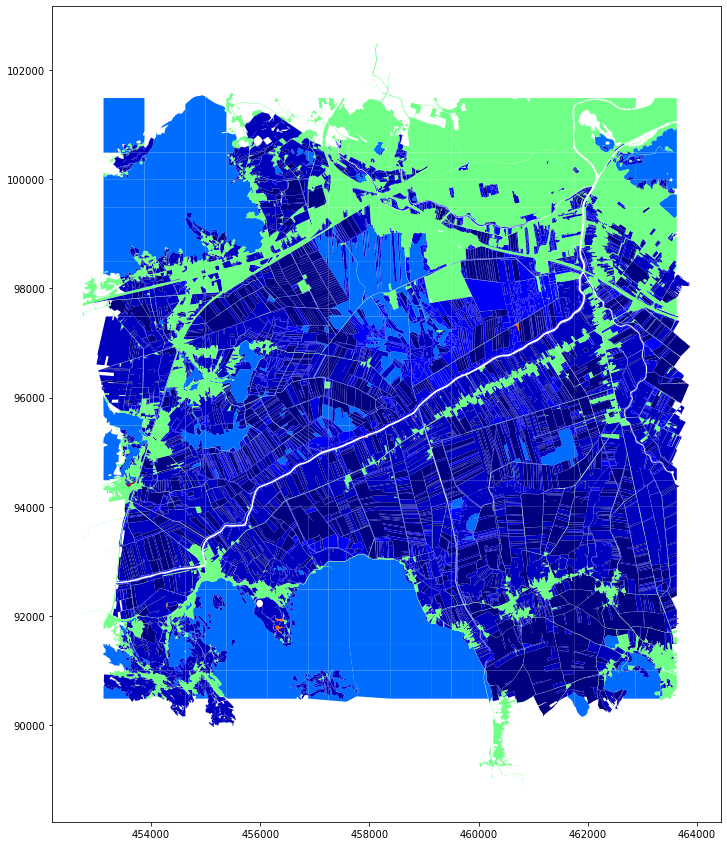

In [9]:
gdf.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 5__: Subselect the data. Here: Select a specific use by defining an ID value to choose 

In [10]:
gdfsub = geodb.get_collection('land_use', database='geodb_test99', query='raba_id=eq.1410')
gdfsub.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


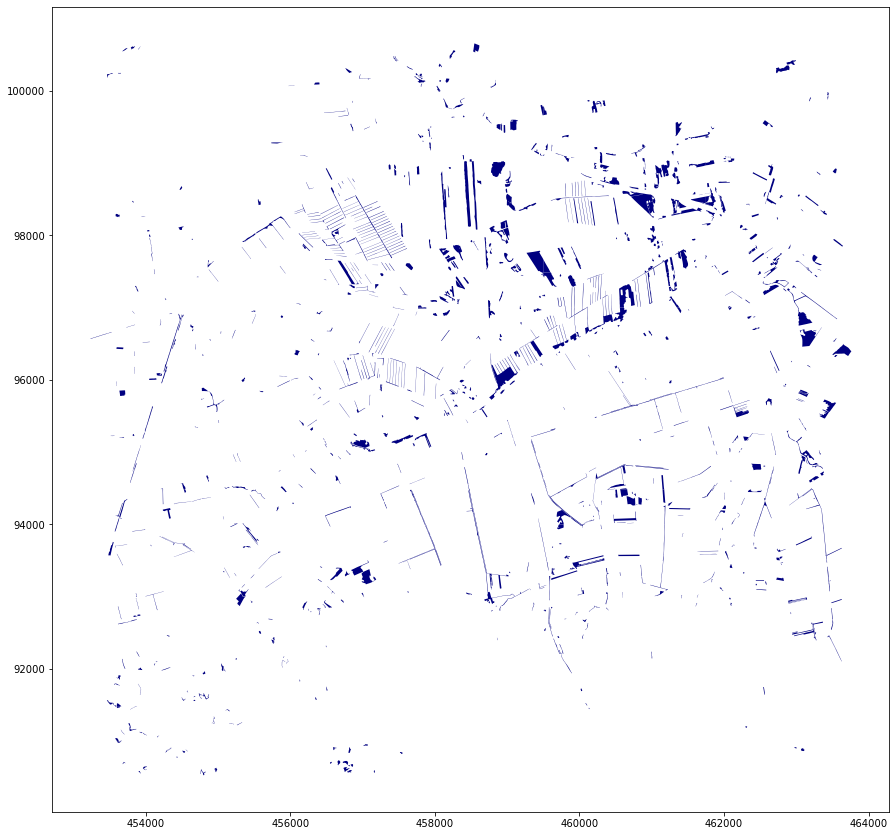

In [11]:
gdfsub.plot(column="raba_id", figsize=(15,15), cmap = 'jet')

__Step 6__: Filter by bbox, limit it to 200 entries

In [12]:
gdf = geodb.get_collection_by_bbox(collection="land_use", database='geodb_test99', bbox = (452750.0, 88909.549, 464000.0, 102486.299), comparison_mode="contains", bbox_crs=3794, limit=200, offset=10)
gdf

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,12,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453673.609 91328.224, 453678.929 913...",5983074,1600,2019-03-26
1,13,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((460312.295 96127.114, 460300.319 961...",5983199,1600,2019-03-11
2,14,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((460459.445 96117.356, 460470.516 961...",5983217,1100,2019-03-11
3,15,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457798.753 99628.982, 457783.076 996...",6299143,1600,2019-03-04
4,16,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((461439.703 92137.401, 461436.166 921...",4643632,1600,2019-02-21
...,...,...,...,...,...,...,...
195,215,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458934.146 95656.658, 458932.345 956...",5966575,1222,2019-01-05
196,216,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((458934.146 95656.658, 458935.525 956...",5966577,1100,2019-01-05
197,217,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455301.879 91279.877, 455302.373 912...",2594677,1100,2019-03-14
198,218,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455207.927 91222.221, 455193.596 912...",2594678,1100,2019-03-14


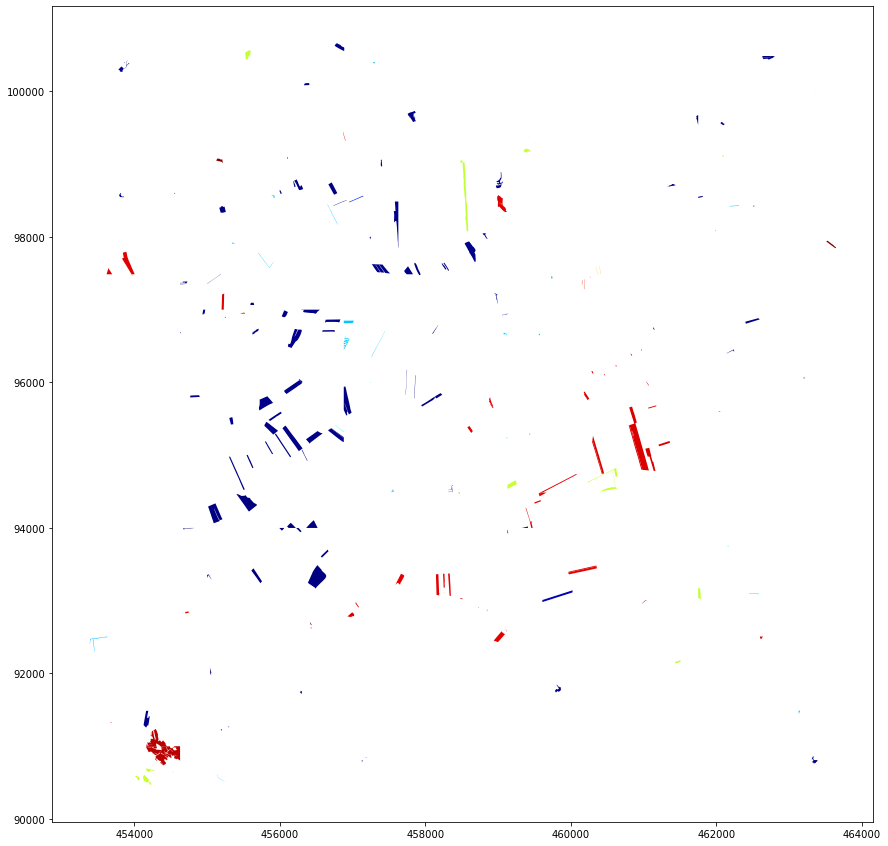

In [13]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 6__: Fltering using PostGres Syntax; see https://www.postgresql.org/docs/9.1/index.html for details

In [14]:
gdf = geodb.get_collection_pg(collection='land_use', database='geodb_test99', where='raba_id=1410')
gdf.head()

,id,created_at,modified_at,geometry,raba_pid,raba_id,d_od
0,1,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((453952.629 91124.177, 453952.696 911...",4770326,1410,2019-03-26
1,62,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457261.001 96349.254, 457256.831 963...",3596498,1410,2019-01-05
2,22,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((455384.809 97907.054, 455380.659 979...",3616776,1410,2019-02-25
3,28,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((462585.734 93088.987, 462567.020 930...",3826126,1410,2019-01-23
4,32,2020-04-29T12:14:03.743456+00:00,None,"POLYGON ((457748.827 96167.354, 457748.394 961...",2309744,1410,2019-01-05


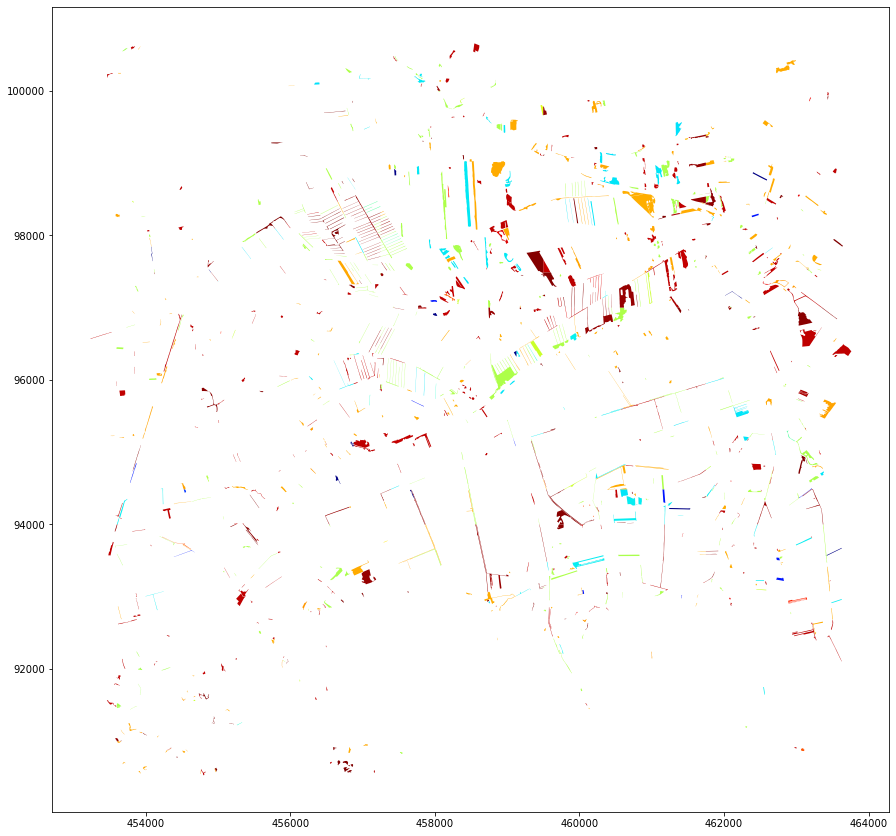

In [15]:
gdf.plot(column="raba_pid", figsize=(15,15), cmap = 'jet')

__Step 7__: Fltering using PostGres Syntax Allowing Aggregation
Here according to data, note that the data set has been reduced to 200 entries above

In [16]:
df = geodb.get_collection_pg('land_use', database='geodb_test99', where='raba_id=1410', group='d_od', select='COUNT(d_od) as ct, d_od')
df.head()

,ct,d_od
0,12,2019-03-21
1,47,2019-02-25
2,17,2019-03-13
3,26,2019-02-20
4,2,2019-04-29
